# **Darbs ar tekstu**

# Klientu atbalsta pieprasījumu automatizēta klasifikācija

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

# Paraugu dati
texts = ['Tehniska problēma', 'Rēķina jautājums', 'Produkta pieprasījums']
labels = [0, 1, 2]  # Piemērs: 0 = tehniskā, 1 = rēķins, 2 = pieprasījums

# Convert labels to NumPy array
labels = np.array(labels) # This line converts the labels list into a NumPy array.

tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(texts)
X = tokenizer.texts_to_sequences(texts)
X = pad_sequences(X, maxlen=100)

# Modeļa izveide
model = Sequential([
    Embedding(input_dim=10000, output_dim=64, input_length=100),
    LSTM(64),
    Dense(3, activation='softmax')  # 3 kategorijas: tehniskā, rēķins, pieprasījums
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(X, labels, epochs=10)

new_texts = ['Tehniska kļūda', 'Rēķina summa', 'Produkta jautājums']

new_sequences = tokenizer.texts_to_sequences(new_texts)
new_X = pad_sequences(new_sequences, maxlen=100)

new_predictions = model.predict(new_X)

predicted_labels = np.argmax(new_predictions, axis=1)

for text, label in zip(new_texts, predicted_labels):
    print(f"Text: {text}, Predicted Label: {label}")


# E-pasta filtrēšana (teksta klasifikācija)

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

# Paraugu e-pasta dati
emails = ['Apsveicam! Jūs esat laimējis balvu', 'Jūsu rēķins ir jāapmaksā', 'Ekskluzīvs piedāvājums tieši jums']
labels = [1, 0, 1]  # 1 = surogātpasts, 0 = nav surogātpasts

tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(emails)
X = tokenizer.texts_to_sequences(emails)
X = pad_sequences(X, maxlen=100)

# Modeļa izveide
model = Sequential([
    Embedding(input_dim=10000, output_dim=64, input_length=100),
    LSTM(64),
    Dense(1, activation='sigmoid')  # 1 binārajai klasifikācijai
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Convert labels to NumPy array
labels = np.array(labels) # This line ensures 'labels' is a NumPy array, which is expected by 'model.fit'

model.fit(X, labels, epochs=10) # The 'labels' variable is now a NumPy array.

# Pieprasījuma prognozēšana noliktavas pārvaldībai (LSTM)

In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Paraugu vēsturiskie pārdošanas dati (piemēram, nedēļas pārdošana)
sales_data = np.array([200, 220, 250, 300, 280, 320, 350, 400, 430, 450])  # Piemērs nedēļas pārdošanai

# Sagatavot datus LSTM
X = sales_data[:-1].reshape((len(sales_data) - 1, 1, 1))
y = sales_data[1:]

# Izveidot LSTM modeli
model = Sequential([
    LSTM(64, input_shape=(1, 1)),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

# Modeļa apmācība
model.fit(X, y, epochs=10)

# Prognozēt nākamo vērtību
forecast = model.predict(np.array([sales_data[-1]]).reshape((1, 1, 1)))
print(f'Nākamā prognozētā pieprasījuma vērtība: {forecast[0][0]}')


# Darbinieku atlases prognozēšana

In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Paraugu darbinieku dati (īpašības: vecums, apmierinātība, gadi uzņēmumā utt.)
X = np.array([[25, 3, 2], [30, 5, 6], [35, 7, 8], [40, 10, 12]])  # Piemērs: īpašības
y = np.array([0, 1, 0, 1])  # 1 = atlase, 0 = nav atlases

# Izveidot DNN modeli
model = Sequential([
    Dense(64, input_dim=3, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  # Izvade: 0 vai 1 (atlases prognoze)
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Modeļa apmācība
model.fit(X, y, epochs=10)

# Piemēra dati prognozēšanai (jauni darbinieki ar līdzīgām īpašībām)
X_new = np.array([[28, 4, 3], [45, 9, 11]])

# Prognozēt, izmantojot apmācīto modeli
predictions = model.predict(X_new)

# Apaļo prognozes uz 0 vai 1 (atlase vai nē)
predictions_binary = (predictions > 0.5).astype(int)

print("Prognozētās iespējas atlasei:", predictions.flatten())
print("Binārās prognozes:", predictions_binary.flatten())


# **Darbs ar tabulam**

# Produkta segmentācija

In [ ]:
# Importējam nepieciešamās bibliotēkas
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from tensorflow import keras
from tensorflow.keras import layers
import seaborn as sns

# Ielādējam MPG datu kopu
df = sns.load_dataset("mpg")

# Apstrādājam trūkstošos datus (aizstājam '?' zīmes ar NaN un aizpildām ar mediānu)
df['horsepower'] = pd.to_numeric(df['horsepower'], errors='coerce')
df['horsepower'].fillna(df['horsepower'].median(), inplace=True)

# Izveidojam jaunu mērķa mainīgo (produkta segmentācija)
# Kategorizējam 'weight' (svara) vērtības trīs produkta segmentos: 'Light', 'Medium', 'Heavy'
df['product_segment'] = pd.cut(df['weight'], bins=[0, 2000, 3000, 5000], labels=['Light', 'Medium', 'Heavy'])

# Ievades dati (X) un mērķa dati (y)
X = df.drop(columns=['mpg', 'product_segment'])
y = pd.get_dummies(df['product_segment'])

# Datu sadalīšana apmācības un testēšanas datu kopās
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a OneHotEncoder for categorical features
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')  # sparse=False for numpy array

# Select numerical and categorical features
numerical_features = ['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year']
categorical_features = ['origin']

encoded_features_train = encoder.fit_transform(X_train[categorical_features])
encoded_features_test = encoder.transform(X_test[categorical_features])

encoded_df_train = pd.DataFrame(encoded_features_train, columns=encoder.get_feature_names_out(categorical_features),
                                index=X_train.index)
encoded_df_test = pd.DataFrame(encoded_features_test, columns=encoder.get_feature_names_out(categorical_features),
                               index=X_test.index)

X_train = pd.concat([X_train[numerical_features], encoded_df_train], axis=1)
X_test = pd.concat([X_test[numerical_features], encoded_df_test], axis=1)

# Standartizējam datus
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Izveidojam vairāku iznākumu neironu tīkla modeli ar Keras produkta segmentācijai
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_dim=X_train.shape[1]),
    layers.Dense(32, activation='relu'),
    layers.Dense(3, activation='softmax')  # Iznākuma slānis ar 3 neironiem (trīs produkta segmenti: Light, Medium, Heavy)
])

# Kompilējam modeli
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Apmācām modeli
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# Novērtējam modeli
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Testa zudums: {loss}")
print(f"Testa precizitāte: {accuracy}")

# Veicam prognozes
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Pārvēršam one-hot kodētās prognozes klases etiķetēs

# Nosaukumu kartēšana (indekss uz verbālo segmentu)
class_names = ['Light', 'Medium', 'Heavy']
y_pred_segments = [class_names[class_idx] for class_idx in y_pred_classes]

# Izdrukājam prognozētās segmentu nosaukumus
print("Prognozētie produkta segmenti (verbāli):", y_pred_segments[:5])  # Parāda tikai pirmās 5 prognozes


In [ ]:
# Importējam nepieciešamās bibliotēkas
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from tensorflow import keras
from tensorflow.keras import layers
import seaborn as sns

# Ielādējam Diamonds datu kopu
df = sns.load_dataset("diamonds")

# Apstrādājam trūkstošos datus (ja tādi ir)
df = df.dropna()

# Izveidojam jaunu mērķa mainīgo (produkts tiek segmentēts pēc cenas)
# Kategoriski segmentējam dimanta cenu
df['price_segment'] = pd.cut(df['price'], bins=[0, 2500, 5000, 10000, 20000], labels=['Low', 'Medium', 'High', 'Luxury'])

# Ievades dati (X) un mērķa dati (y)
X = df.drop(columns=['price', 'price_segment'])
y = pd.get_dummies(df['price_segment'])  # Vienas karstās kodēšanas metode mērķa mainīgajam

# Sadalām datus apmācības un testēšanas datu kopās
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vienas karstās kodēšanas metode kategoriskajiem atribūtiem
categorical_features = ['cut', 'color', 'clarity']
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoded_categorical_train = encoder.fit_transform(X_train[categorical_features])
encoded_categorical_test = encoder.transform(X_test[categorical_features])

# Izveidojam DataFrames kategoriskajiem atribūtiem, kas kodēti ar vienas karstās kodēšanas metodi
encoded_df_train = pd.DataFrame(encoded_categorical_train,
                                columns=encoder.get_feature_names_out(categorical_features),
                                index=X_train.index)
encoded_df_test = pd.DataFrame(encoded_categorical_test,
                               columns=encoder.get_feature_names_out(categorical_features),
                               index=X_test.index)

# Noņemam oriģinālās kategoriskās kolonnas un pievienojam kodētās kolonnas
X_train = X_train.drop(columns=categorical_features)
X_train = pd.concat([X_train, encoded_df_train], axis=1)

X_test = X_test.drop(columns=categorical_features)
X_test = pd.concat([X_test, encoded_df_test], axis=1)

# Standartizējam datus
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Izveidojam vairāku iznākumu neironu tīkla modeli ar Keras, lai segmentētu produktu pēc cenas
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_dim=X_train.shape[1]),  # Slānis ar 64 neironiem un ReLU aktivācijas funkciju
    layers.Dense(32, activation='relu'),  # Slānis ar 32 neironiem un ReLU aktivācijas funkciju
    layers.Dense(4, activation='softmax')  # Izejas slānis ar 4 neironiem (četri produkta segmenti: Low, Medium, High, Luxury)
])

# Kompilējam modeli
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Apmācām modeli
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# Novērtējam modeli
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Testa zudums: {loss}")
print(f"Testa precizitāte: {accuracy}")

# Veicam prognozes
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Pārvēršam vienas karstās kodēšanas prognozes klasēs

# Nosaukumu kartēšana (indekss uz verbālo segmentu)
class_names = ['Low', 'Medium', 'High', 'Luxury']
y_pred_segments = [class_names[class_idx] for class_idx in y_pred_classes]

# Izdrukājam prognozētos segmentu nosaukumus
print("Prognozētie produkta segmenti (verbāli):", y_pred_segments[:5])  # Parāda tikai pirmās 5 prognozes


# Cenu prognoze

In [ ]:
# Importējam nepieciešamās bibliotēkas
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras import layers
import seaborn as sns

# Ielādējam Diamonds datu kopu
df = sns.load_dataset("diamonds")

# Pārliecināmies, ka nav nulles vērtību
df = df.dropna()

# Kategoriskos mainīgos (cut, color, clarity) pārvēršam skaitliskās vērtībās
df = pd.get_dummies(df, columns=['cut', 'color', 'clarity'], drop_first=True)

# Ievades dati (X) un mērķa dati (y)
X = df.drop(columns=['price'])  # Cenas kā mērķa mainīgais
y = df['price']

# Datu sadalīšana apmācības un testēšanas datu kopās
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standartizējam ievades datus
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Izveidojam regresijas neironu tīkla modeli ar Keras
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_dim=X_train.shape[1]),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)  # Iznākuma slānis vienai nepārtrauktai vērtībai (regresija)
])

# Kompilējam modeli
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])

# Apmācām modeli
model.fit(X_train, y_train, epochs=30, batch_size=64, validation_data=(X_test, y_test))

# Funkcija verbālām prognozēm
def verbal_prediction(price):
    if price < 1000:
        return f"Cena ({price:.2f}): Zema. Labs budžeta risinājums."
    elif 1000 <= price < 5000:
        return f"Cena ({price:.2f}): Vidēja. Laba kvalitāte par samērīgu cenu."
    elif 5000 <= price < 10000:
        return f"Cena ({price:.2f}): Augsta. Ekskluzīvs un augstas klases produkts."
    else:
        return f"Cena ({price:.2f}): Luksusa līmenis. Piemērots prestižiem gadījumiem."

# Veicam prognozes
y_pred = model.predict(X_test)
print(f"Pirmās 5 prognozētās cenas: {y_pred[:5].flatten()}")
for i in range(5):
    predicted_price = y_pred[i][0]
    print(verbal_prediction(predicted_price))


In [5]:
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras import layers

# Ielādējam California Housing datu kopu
data = fetch_california_housing(as_frame=True)
df = data.frame

# Ievades dati (X) un mērķa dati (y)
X = df.drop(columns=["MedHouseVal"])  # Mērķa kolonna ir MedHouseVal
y = df["MedHouseVal"]

# Datu sadalīšana apmācības un testēšanas datu kopās
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standartizējam ievades datus
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# RNN ievades datiem nepieciešams 3D formāts: (samples, timesteps, features)
# Šeit "timesteps" būs 1, jo katrs paraugs ir neatkarīgs
X_train_rnn = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test_rnn = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

# Izveidojam RNN regresijas modeli
model = keras.Sequential([
    layers.SimpleRNN(64, activation='relu', input_shape=(X_train_rnn.shape[1], X_train_rnn.shape[2])),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)  # Iznākuma slānis vienai nepārtrauktai vērtībai (regresija)
])

# Kompilējam modeli
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])

# Apmācām modeli
model.fit(X_train_rnn, y_train, epochs=30, batch_size=64, validation_data=(X_test_rnn, y_test))

# Funkcija verbālām prognozēm
def verbal_prediction(price):
    price_in_usd = price * 1000  # Konvertējam cenu uz ASV dolāriem
    if price_in_usd < 200000:
        return f"Cena (${price_in_usd:.2f}): Zema. Piemērota ekonomiskai dzīvošanai."
    elif 200000 <= price_in_usd < 400000:
        return f"Cena (${price_in_usd:.2f}): Vidēja. Labs līdzsvars starp cenu un kvalitāti."
    elif 400000 <= price_in_usd < 600000:
        return f"Cena (${price_in_usd:.2f}): Augsta. Piemērota ērtai un kvalitatīvai dzīvošanai."
    else:
        return f"Cena (${price_in_usd:.2f}): Luksusa mājoklis ar augstu vērtību."

# Veicam prognozes
y_pred = model.predict(X_test_rnn)

# Izdrukājam pirmās 5 prognozes un verbālās prognozes
print(f"Pirmās 5 prognozētās cenas (ASV dolāros): {y_pred[:5].flatten() * 1000}")
for i in range(5):
    predicted_price = y_pred[i][0]
    print(verbal_prediction(predicted_price))


Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


258/258 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - loss: 2.2514 - mean_absolute_error: 1.0402 - val_loss: 0.5019 - val_mean_absolute_error: 0.5036
Epoch 2/30
258/258 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.4609 - mean_absolute_error: 0.4791 - val_loss: 0.4113 - val_mean_absolute_error: 0.4494
Epoch 3/30
258/258 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3850 - mean_absolute_error: 0.4429 - val_loss: 0.3857 - val_mean_absolute_error: 0.4495
Epoch 4/30
258/258 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3882 - mean_absolute_error: 0.4376 - val_loss: 0.3720 - val_mean_absolute_error: 0.4476
Epoch 5/30
258/258 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3700 - mean_absolute_error: 0.4292 - val_loss: 0.3564 - val_mean_absolute_error: 0.4209
Epoch 6/30
258/258 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3514 - mean_absolute_error: 0.4181 - val_loss: 0.3475 - val_mean_absolute_error: 0.4178
Epoch 7/30
258/258 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3308 - mean_absolute_error: 0.4063 - val_loss: 0

# **Darbs ar attēliem**

# OCR ar Keras

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 56s 36ms/step - accuracy: 0.9019 - loss: 0.3271 - val_accuracy: 0.9814 - val_loss: 0.0660
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 52s 35ms/step - accuracy: 0.9848 - loss: 0.0488 - val_accuracy: 0.9853 - val_loss: 0.0476
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 83s 35ms/step - accuracy: 0.9901 - loss: 0.0310 - val_accuracy: 0.9887 - val_loss: 0.0426
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 54s 36ms/step - accuracy: 0.9934 - loss: 0.0197 - val_accuracy: 0.9878 - val_loss: 0.0413
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 79s 34ms/step - accuracy: 0.9947 - loss: 0.0150 - val_accuracy: 0.9877 - val_loss: 0.0450
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.9850 - loss: 0.0487
Test Accuracy: 0.99
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


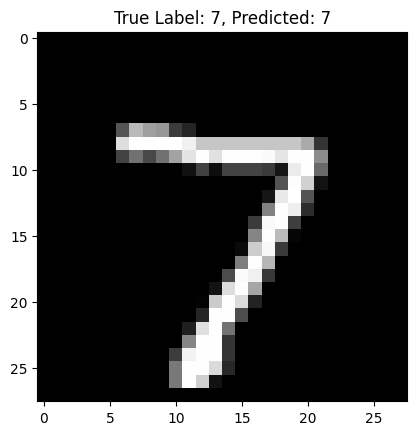

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


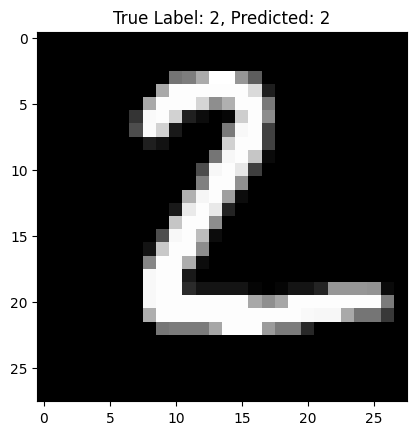

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


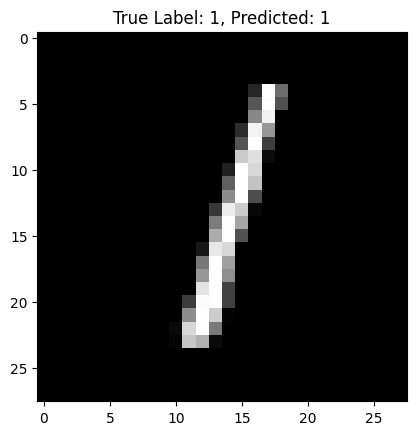

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


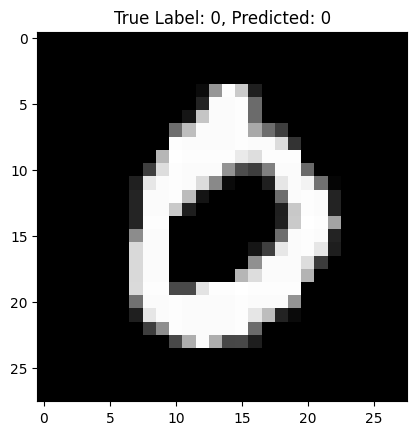

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


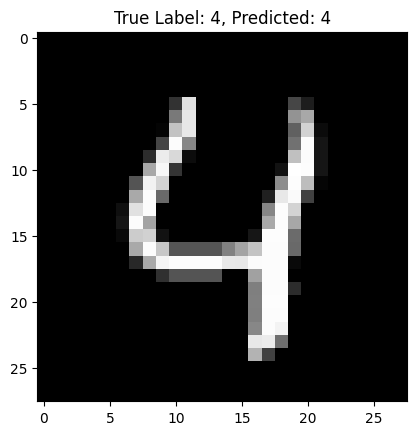

In [ ]:
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# 1. solis: Ielādēt MNIST datu kopu
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalizēt datus (pārveidot pikseļu vērtības intervālā [0, 1])
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Pārveidot datus, lai iekļautu kanāla dimensiju (nepieciešams CNN)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

# Pārveidot marķējumus uz vienas karstās kodēšanas formātu
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# 2. solis: Izveidot modeli
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')  # 10 izlaides klases (cipari 0-9)
])

# 3. solis: Kompilēt modeli
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# 4. solis: Trenēt modeli
history = model.fit(x_train, y_train, epochs=5, batch_size=32, validation_split=0.2)

# 5. solis: Novērtēt modeli
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Testa precizitāte: {test_accuracy:.2f}")

# 6. solis: Vizualizēt prognozes
def display_prediction(index):
    plt.imshow(x_test[index].reshape(28, 28), cmap='gray')
    plt.title(f"Patiesais marķējums: {np.argmax(y_test[index])}, Prognozētais: {np.argmax(model.predict(np.expand_dims(x_test[index], axis=0)))}")
    plt.show()

# Parādīt prognozes 5 testa paraugiem
for i in range(5):
    display_prediction(i)


# AutoKeras

In [18]:
!pip install autokeras

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 122.7/122.7 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 691.2/691.2 kB 23.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 85.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 615.3/615.3 MB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 44.5 MB/s eta 0:00:00
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.17.1
    Uninstalling tensorboard-2.17.1:
      Successfully uninstalled tensorboard-2.17.1
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.17.1
    Uninstalling tensorflow-2.17.1:
      Successfully uninstalled tensorflow-2.17.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tf-

In [ ]:
import autokeras as ak
import numpy as np
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt

# 1. solis: Ielādēt Fashion MNIST datu kopu
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Normalizēt datus (pārveidot pikseļu vērtības intervālā [0, 1])
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Pārveidot datus, lai iekļautu kanāla dimensiju (nepieciešams AutoKeras)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

# 2. solis: Definēt AutoKeras attēlu klasifikatoru
clf = ak.ImageClassifier(max_trials=2,  # Meklējamo modeļu izmēģinājumu skaits
                          overwrite=True)

# 3. solis: Trenēt modeli
clf.fit(x_train, y_train, epochs=3, validation_split=0.2)

# 4. solis: Novērtēt modeli
test_accuracy = clf.evaluate(x_test, y_test)[1]
print(f"Testa precizitāte: {test_accuracy:.2f}")

# 5. solis: Veikt prognozes
predicted_y = clf.predict(x_test)

# 6. solis: Vizualizēt prognozes
def display_prediction(index):
    class_names = [
        "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
        "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
    ]
    plt.imshow(x_test[index].reshape(28, 28), cmap='gray')
    plt.title(f"Patiesais marķējums: {class_names[y_test[index]]}, Prognozētais: {class_names[np.argmax(predicted_y[index])]}")
    plt.show()

# Parādīt prognozes 5 testa paraugiem
for i in range(5):
    display_prediction(i)

